## Dataset information

[kaggle link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data
)

[original data source web site](https://www.cdc.gov/brfss/annual_data/annual_2015.html
)


[original data source file](https://www.cdc.gov/brfss/annual_data/2015/pdf/overview_2015.pdf
)

## ToDO
1. Determine important predictors using Regularization
2. Use regularization to prevent overfitting
    - Regularization helps to prevent overfitting by keeping the weights small.
3. Use Radial basis function kernel (uses CV <- double checkt that) (check how to set gamma)
4. Smote the data?
5. use k-nearest-neighbour



## Imports and download

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from google.colab import drive
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from scipy.stats import mode

In [ ]:
import kagglehub
DATA_PATH = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Read CSV and create df

In [ ]:
print(DATA_PATH)
print(os.listdir(DATA_PATH))
data = DATA_PATH +'/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(data)
df.describe()

/kaggle/input/diabetes-health-indicators-dataset
['diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## One-hot-encoding & Standardizing
IMPORTANT: Standardizing training with testing data leaks information of the testing data:




In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

target_col = 'Diabetes_012'
numerical = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

unique = df.nunique()
already_one_hot, categorical = [], []

check_cols = [col for col in df.columns if col not in numerical + [target_col]]

for col in check_cols:
    if unique[col] == 2:
        already_one_hot.append(col)
    else:
        categorical.append(col)

df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical] = scaler.fit_transform(df_encoded[numerical])

print("One-hot encoded columns:", already_one_hot)
print("Categorical columns (one-hot applied):", categorical)
print("Numerical columns standardized:", numerical)
print("Target column:", target_col)

print(df_encoded.columns)


One-hot encoded columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Categorical columns (one-hot applied): ['GenHlth', 'Education', 'Income']
Numerical columns standardized: ['BMI', 'MentHlth', 'PhysHlth', 'Age']
Target column: Diabetes_012
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'GenHlth_2.0', 'GenHlth_3.0',
       'GenHlth_4.0', 'GenHlth_5.0', 'Education_2.0', 'Education_3.0',
       'Education_4.0', 'Education_5.0', 'Education_6.0', 'Income_2.0',
       'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0'],
      dtype='object')


# Analyze dataset
- Class Distribution
- Detecting Outliers using the Empirical Rule/68–95–99.7 rule

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
0.021210622257641962


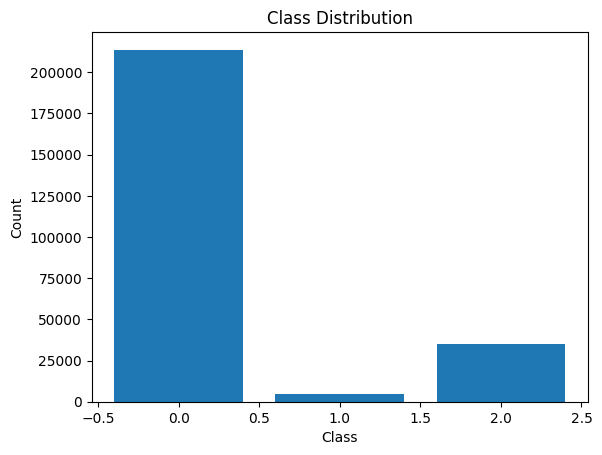

In [ ]:

class_count = df_encoded[target_col].value_counts()
print(class_count)
print(class_count[1] / (class_count[0] + class_count[1]))
plt.bar(class_count.index, class_count.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


Number of Outliers per Feature:
MentHlth    12697
BMI          2963
PhysHlth        0
Age             0
dtype: int64


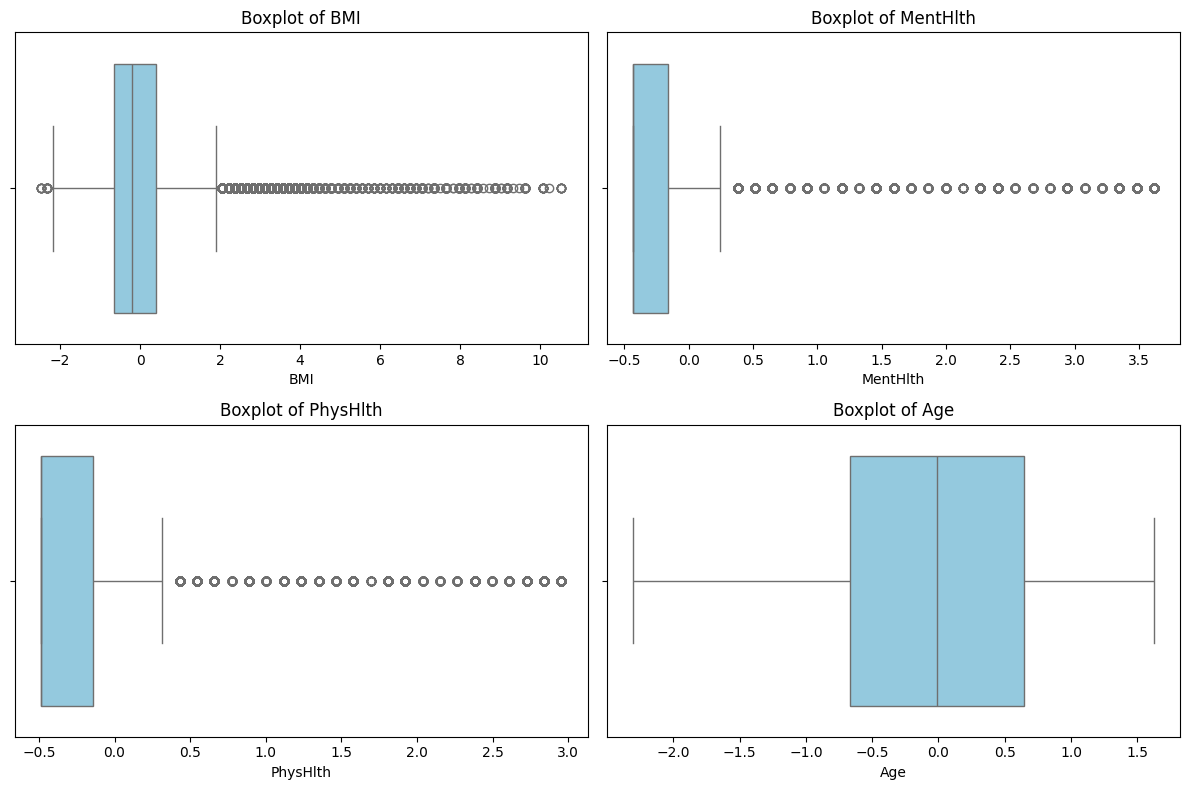

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.stats import zscore

# Only apply on your standardized numerical columns
z_scores = np.abs(zscore(df_encoded[numerical]))


outlier_mask = (z_scores > 3)

outlier_counts = outlier_mask.sum(axis=0)

print("Number of Outliers per Feature:")
print(pd.Series(outlier_counts, index=numerical).sort_values(ascending=False))

import seaborn as sns

plt.figure(figsize=(12, 8))
for idx, col in enumerate(numerical):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(x=df_encoded[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

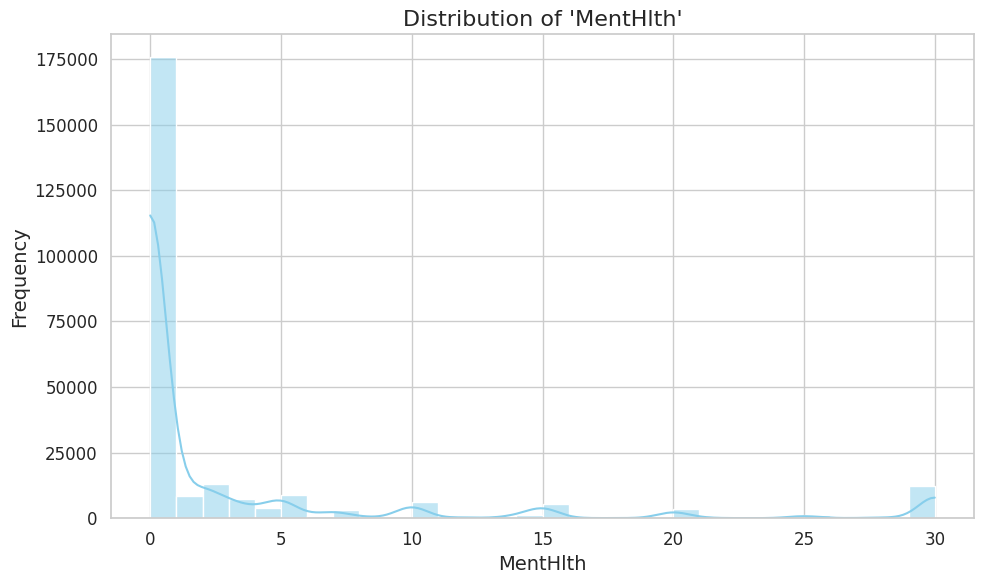

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice plot style
sns.set(style="whitegrid")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MentHlth'], bins=30, kde=True, color='skyblue')

# Customize labels and title
plt.title("Distribution of 'MentHlth'", fontsize=16)
plt.xlabel("MentHlth", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


# Remove outliers from the dataset

In [ ]:
from scipy.stats import zscore
import numpy as np


z_scores = np.abs(zscore(df_encoded[numerical]))
non_outlier_mask = (z_scores <= 3).all(axis=1)
df_encoded = df_encoded[non_outlier_mask].reset_index(drop=True)

print(f"Outlier removal done. New dataset size: {df_encoded.shape[0]}")


Outlier removal done. New dataset size: 238352


# Combine Class 1 and 2 -> Diabetes and no diabetes


In [ ]:
df_encoded[target_col].replace({2: 1}, inplace=True)

<ipython-input-8-bf348957250c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[target_col].replace({2: 1}, inplace=True)


# Split into Training & Testing

In [ ]:
# Prepare data
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())

Diabetes_012
0.0    161998
1.0     28683
Name: count, dtype: int64


# LASSO with L1 Regularization

In [ ]:
print(X_train.shape)

(190681, 34)


Best C found by cross-validation: 0.0529831690628371


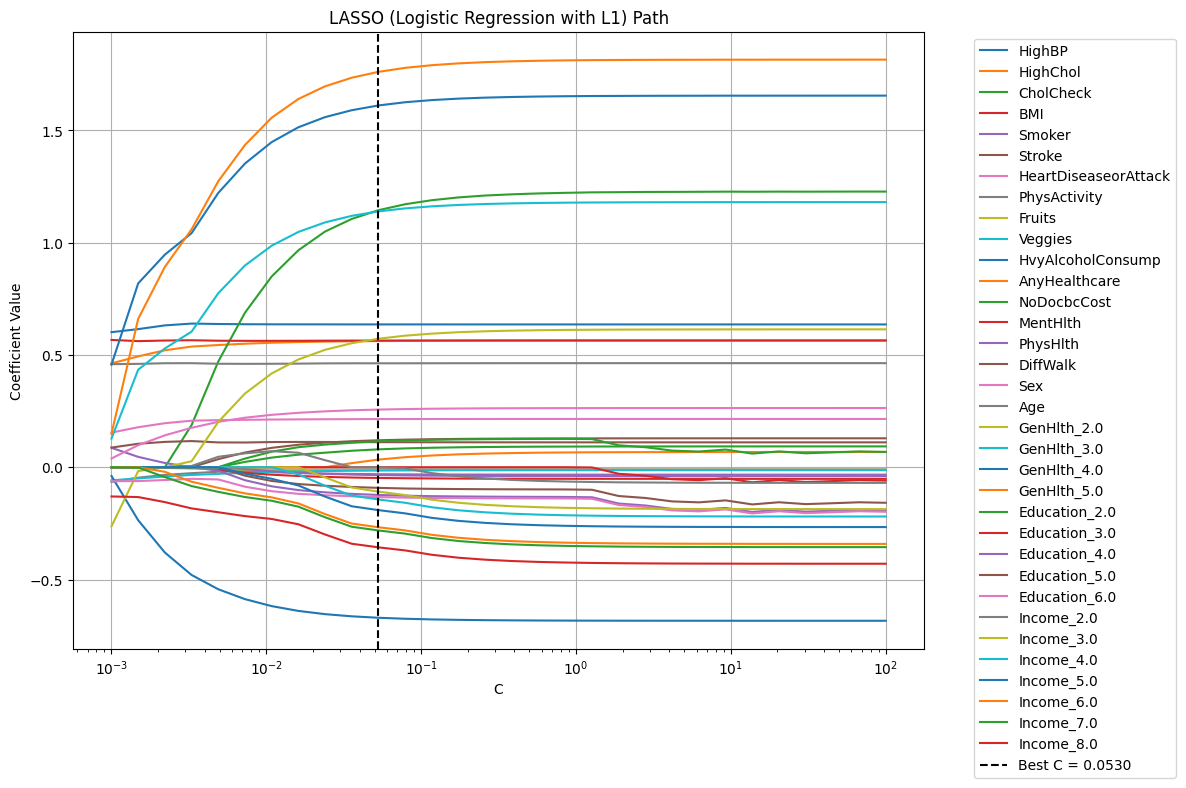

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

model_cv = LogisticRegressionCV(
    Cs=np.logspace(-3, 2, 30),
    cv=2,
    penalty='l1',
    solver='liblinear',
    scoring='f1_weighted',
    max_iter=1000,
    refit=True,
    class_weight='balanced'
)

model_cv.fit(X_train, y_train)

best_C = model_cv.C_[0]
print("Best C found by cross-validation:", best_C)


Cs_path = np.logspace(-3, 2, 30)
coefs = []

for C in Cs_path:
    model = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=C,
        max_iter=1000,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)
    coefs.append(model.coef_.flatten())

coefs = np.array(coefs)

# 3. Plot the coefficient paths
plt.figure(figsize=(12, 8))

# Plot each coefficient path
for i in range(coefs.shape[1]):
    plt.plot(Cs_path, coefs[:, i ], label=f'{X_train.columns[i]}')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Coefficient Value')
plt.title('LASSO (Logistic Regression with L1) Path')

# 4. Mark the best C
plt.axvline(x=best_C, color='black', linestyle='--', label=f'Best C = {best_C:.4f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Define a small threshold
threshold = 0.0

# Find the coefficients for the best C
best_c_index = np.argmin(np.abs(Cs_path - best_C))
best_coefs = coefs[best_c_index]

# Get predictors with "almost zero" coefficient
zero_like_predictors = X_train.columns[np.abs(best_coefs) <= threshold]
print(f"Predictors with coefficient eqaul to {threshold} at best C:")
for predictor in zero_like_predictors:
    print(predictor)

Predictors with coefficient eqaul to 0.0 at best C:
Education_3.0
Income_2.0


In [ ]:
print("Best predictors based on LASSO:")

best_predictors = []
for predictor,coef in zip(X_train.columns,best_coefs):
    if abs(coef) > 0.4:
      print(f"{predictor} : {coef}")
      best_predictors.append(predictor)

Best predictors based on LASSO:
HighBP : 0.6358508329025682
HighChol : 0.5616507499303677
CholCheck : 1.1444214273239064
BMI : 0.563954509203942
HvyAlcoholConsump : -0.670275338285626
Age : 0.4626905732918582
GenHlth_2.0 : 0.5721764636364497
GenHlth_3.0 : 1.1390410875907622
GenHlth_4.0 : 1.6107283457690131
GenHlth_5.0 : 1.7603814551841392


In [ ]:
best_predictors = ['HighBP','HighChol','CholCheck','BMI','HvyAlcoholConsump','Age','GenHlth_2.0','GenHlth_3.0','GenHlth_4.0','GenHlth_5.0']

Classification Report & Confusion Matrix: Training
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80    143314
         1.0       0.34      0.75      0.47     28586

    accuracy                           0.71    171900
   macro avg       0.64      0.73      0.64    171900
weighted avg       0.84      0.71      0.75    171900

Classification Report & Confusion Matrix: Testing
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     35867
         1.0       0.34      0.76      0.47      7108

    accuracy                           0.72     42975
   macro avg       0.64      0.73      0.64     42975
weighted avg       0.84      0.72      0.75     42975



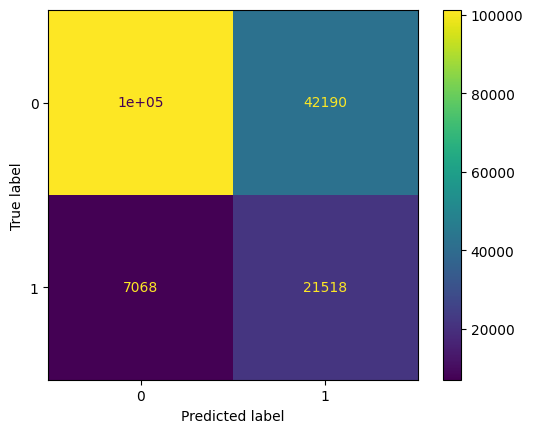

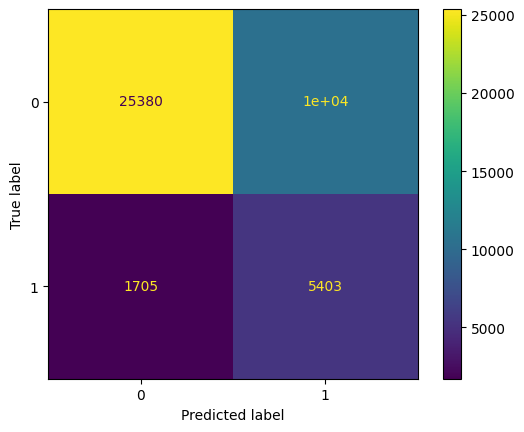

In [ ]:
test_accuracy = model_cv.score(X_test, y_test)
y_pred = model_cv.predict(X_test)
print('Classification Report & Confusion Matrix: Training')
print(classification_report(y_train,model_cv.predict(X_train)))
conf_train = confusion_matrix(y_train,model_cv.predict(X_train))
ConfusionMatrixDisplay(conf_train).plot()

print('Classification Report & Confusion Matrix: Testing')
print(classification_report(y_test, y_pred))
conf_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_test).plot()

In [ ]:

model = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    C=0.0530,
    random_state=42,
    class_weight='balanced'
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     35867
         1.0       0.34      0.76      0.47      7108

    accuracy                           0.72     42975
   macro avg       0.64      0.73      0.64     42975
weighted avg       0.84      0.72      0.75     42975



:# Drop predictors with smaller coeff < 0.001


In [ ]:
X_train.drop(columns=zero_like_predictors, inplace=True)
X_test.drop(columns=zero_like_predictors, inplace=True)
print(f'dropping predictors: {zero_like_predictors}')


dropping predictors: Index(['Smoker', 'AnyHealthcare', 'PhysHlth', 'Education_3.0'], dtype='object')


# Subsampling for high computational cost algorithms
- Subsampling by just taking random elements

## Clustering for subsampling
- K-Means
- Minibatch K-Means
- DB-Scan
- Spectral Clustering
- Self-Organizing Maps (SOM) (uses neural network)
- Density-based clustering, approach maybe?

# Random subsampling

In [ ]:
# Random subsampling
from sklearn.model_selection import train_test_split

# Step 1: Split the data using sklearn with fixed random seed
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

X_train_subsampled,X_test_subsampled,y_train_subsampled,y_test_subsampled = train_test_split(X, y,train_size=4000, test_size=1000, random_state=42)


# Subsampling using K-Means

In [ ]:

# Choose number of clusters
k = 1200  # change this to your desired number of clusters
# 4 clusters take 1 second

# Run K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)




IndexError: boolean index did not match indexed array along axis 0; size of axis is 2000 but size of corresponding boolean axis is 202944

In [ ]:
# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

cluster_labels = np.zeros(k, dtype=int)

for cluster_id in range(k):
    mask = (labels == cluster_id)

    if np.sum(mask) == 0:
        continue

    # Find majority class for this cluster
    majority_class = mode(y_train[mask], keepdims=False).mode
    cluster_labels[cluster_id] = majority_class

reduced_X = kmeans.cluster_centers_
reduced_y = cluster_labels

print(f"Reduced dataset shape: {reduced_X.shape}")
print(f"Reduced labels shape: {reduced_y.shape}")


Reduced dataset shape: (1200, 34)
Reduced labels shape: (1200,)


In [ ]:
X_train_subsampled = reduced_X
y_train_subsampled = reduced_y

# Logistic Regression

In [ ]:

model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_subsampled, y_train_subsampled)

y_pred_train = model.predict(X_train_subsampled)



print(classification_report(y_train_subsampled, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    127441
         1.0       0.33      0.77      0.46     22559

    accuracy                           0.73    150000
   macro avg       0.64      0.75      0.64    150000
weighted avg       0.85      0.73      0.76    150000



# Support Vector Machine
- Apply with RBF kernel
- Check results ROC, Conf Matrix

In [ ]:
rbf_kernel = SVC(kernel='rbf', C=0.058, gamma=1.0,class_weight='balanced') #
rbf_kernel.fit(X_train_subsampled, y_train_subsampled)

y_test_pred = rbf_kernel.predict(X_test_subsampled)
y_train_pred  = rbf_kernel.predict(X_train_subsampled)

In [ ]:
report_test = classification_report(y_test_subsampled, y_test_pred)
report_train = classification_report(y_train_subsampled, y_train_pred)

print("Class Report Matrix Train:")
print(report_train)
print("Class Repport Matrix Test:")
print(report_test)



Class Report Matrix Train:
              precision    recall  f1-score   support

         0.0       0.99      0.02      0.04      3319
         1.0       0.17      1.00      0.30       681

    accuracy                           0.19      4000
   macro avg       0.58      0.51      0.17      4000
weighted avg       0.85      0.19      0.08      4000

Class Repport Matrix Test:
              precision    recall  f1-score   support

         0.0       0.95      0.02      0.04       836
         1.0       0.17      0.99      0.28       164

    accuracy                           0.18      1000
   macro avg       0.56      0.51      0.16      1000
weighted avg       0.82      0.18      0.08      1000



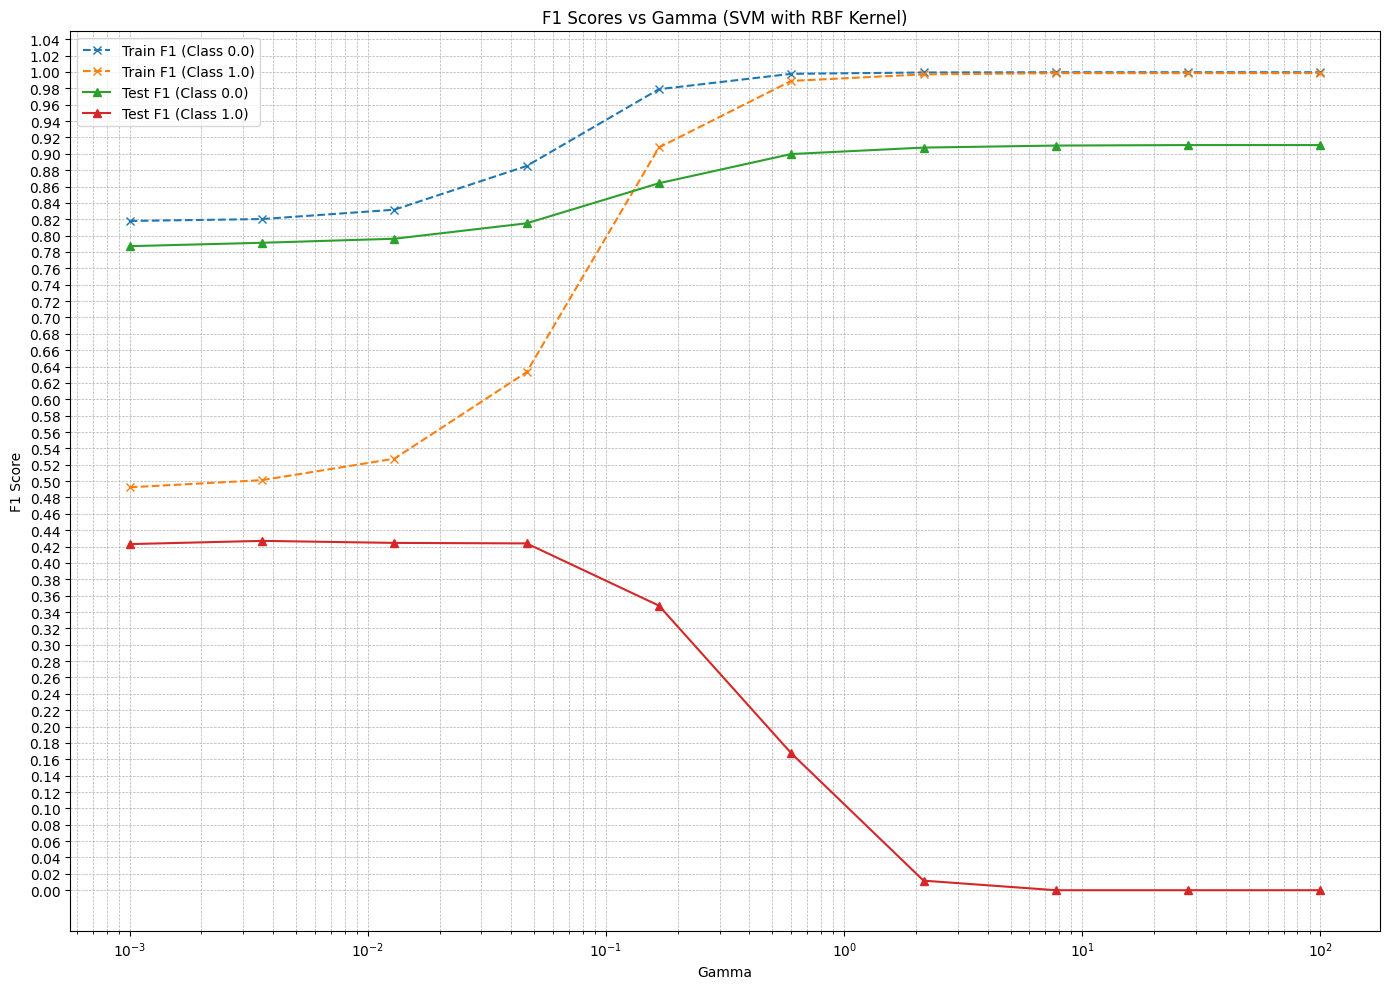

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Random subsampling
gamma_values = np.logspace(-3, 2, 10)

f1_train_scores = []
f1_test_scores = []

f1_train_class0 = []
f1_train_class1 = []
f1_test_class0 = []
f1_test_class1 = []

for gamma in gamma_values:
    rbf_kernel = SVC(kernel='rbf', C=10.0, gamma=gamma, class_weight='balanced')
    rbf_kernel.fit(X_train_subsampled, y_train_subsampled)

    y_train_pred = rbf_kernel.predict(X_train_subsampled)
    y_test_pred = rbf_kernel.predict(X_test_subsampled)

    # Weighted scores
    f1_train_scores.append(f1_score(y_train_subsampled, y_train_pred, average='weighted', zero_division=0))
    f1_test_scores.append(f1_score(y_test_subsampled, y_test_pred, average='weighted', zero_division=0))

    # Per-class scores
    f1_train_per_class = f1_score(y_train_subsampled, y_train_pred, average=None, labels=[0.0, 1.0], zero_division=0)
    f1_test_per_class = f1_score(y_test_subsampled, y_test_pred, average=None, labels=[0.0, 1.0], zero_division=0)

    f1_train_class0.append(f1_train_per_class[0])
    f1_train_class1.append(f1_train_per_class[1])
    f1_test_class0.append(f1_test_per_class[0])
    f1_test_class1.append(f1_test_per_class[1])

# --- Plotting ---
plt.figure(figsize=(14, 10))


# Per-class
plt.plot(gamma_values, f1_train_class0, marker='x', linestyle='--', label='Train F1 (Class 0.0)')
plt.plot(gamma_values, f1_train_class1, marker='x', linestyle='--', label='Train F1 (Class 1.0)')
plt.plot(gamma_values, f1_test_class0, marker='^', linestyle='-', label='Test F1 (Class 0.0)')
plt.plot(gamma_values, f1_test_class1, marker='^', linestyle='-', label='Test F1 (Class 1.0)')

# Axis formatting
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.title('F1 Scores vs Gamma (SVM with RBF Kernel)')
plt.xticks(gamma_values)
plt.xscale('log')
plt.grid(True)
plt.yticks(np.round(np.arange(0.0, 1.05, 0.02), 2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Random subsampling
gamma_values = np.logspace(-3, 2, 10)

f1_train_scores = []
f1_test_scores = []

f1_train_class0 = []
f1_train_class1 = []
f1_test_class0 = []
f1_test_class1 = []

for gamma in gamma_values:
    rbf_kernel = SVC(kernel='rbf', C=10.0, gamma=gamma, class_weight='balanced')
    rbf_kernel.fit(X_train_subsampled, y_train_subsampled)

    y_train_pred = rbf_kernel.predict(X_train_subsampled[best_predictors])
    y_test_pred = rbf_kernel.predict(X_test_subsampled[best_predictors])

    # Weighted scores
    f1_train_scores.append(f1_score(y_train_subsampled, y_train_pred, average='weighted', zero_division=0))
    f1_test_scores.append(f1_score(y_test_subsampled, y_test_pred, average='weighted', zero_division=0))

    # Per-class scores
    f1_train_per_class = f1_score(y_train_subsampled, y_train_pred, average=None, labels=[0.0, 1.0], zero_division=0)
    f1_test_per_class = f1_score(y_test_subsampled, y_test_pred, average=None, labels=[0.0, 1.0], zero_division=0)

    f1_train_class0.append(f1_train_per_class[0])
    f1_train_class1.append(f1_train_per_class[1])
    f1_test_class0.append(f1_test_per_class[0])
    f1_test_class1.append(f1_test_per_class[1])

# --- Plotting ---
plt.figure(figsize=(14, 10))


# Per-class
plt.plot(gamma_values, f1_train_class0, marker='x', linestyle='--', label='Train F1 (Class 0.0)')
plt.plot(gamma_values, f1_train_class1, marker='x', linestyle='--', label='Train F1 (Class 1.0)')
plt.plot(gamma_values, f1_test_class0, marker='^', linestyle='-', label='Test F1 (Class 0.0)')
plt.plot(gamma_values, f1_test_class1, marker='^', linestyle='-', label='Test F1 (Class 1.0)')

# Axis formatting
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.title('F1 Scores vs Gamma (SVM with RBF Kernel)')
plt.xticks(gamma_values)
plt.xscale('log')
plt.grid(True)
plt.yticks(np.round(np.arange(0.0, 1.05, 0.02), 2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# t-Distributed Stochastic Neighbor Embedding (TSNE)
TODO
- TSNE is in $O(n^2)$ -> subsampling is needed
- Map datapoints into 2D/3D Space

How To
For each point $i $:

- It calculates the (squared) Euclidean distance to all other points $j$.
- It defines a Gaussian centered at point $i$, with a certain variance $ \sigma_i$.
- The variance controls how "spread out" the neighborhood is around $i$.
- (The variance is tuned so that the perplexity stays roughly constant.)

$
p_{j|i} = \frac{\exp\left( -\frac{\|x_i - x_j\|^2}{2\sigma_i^2} \right)}{\sum_{k \neq i} \exp\left( -\frac{\|x_i - x_k\|^2}{2\sigma_i^2} \right)}
$

- Use maybe cosine, instead of euclidian


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


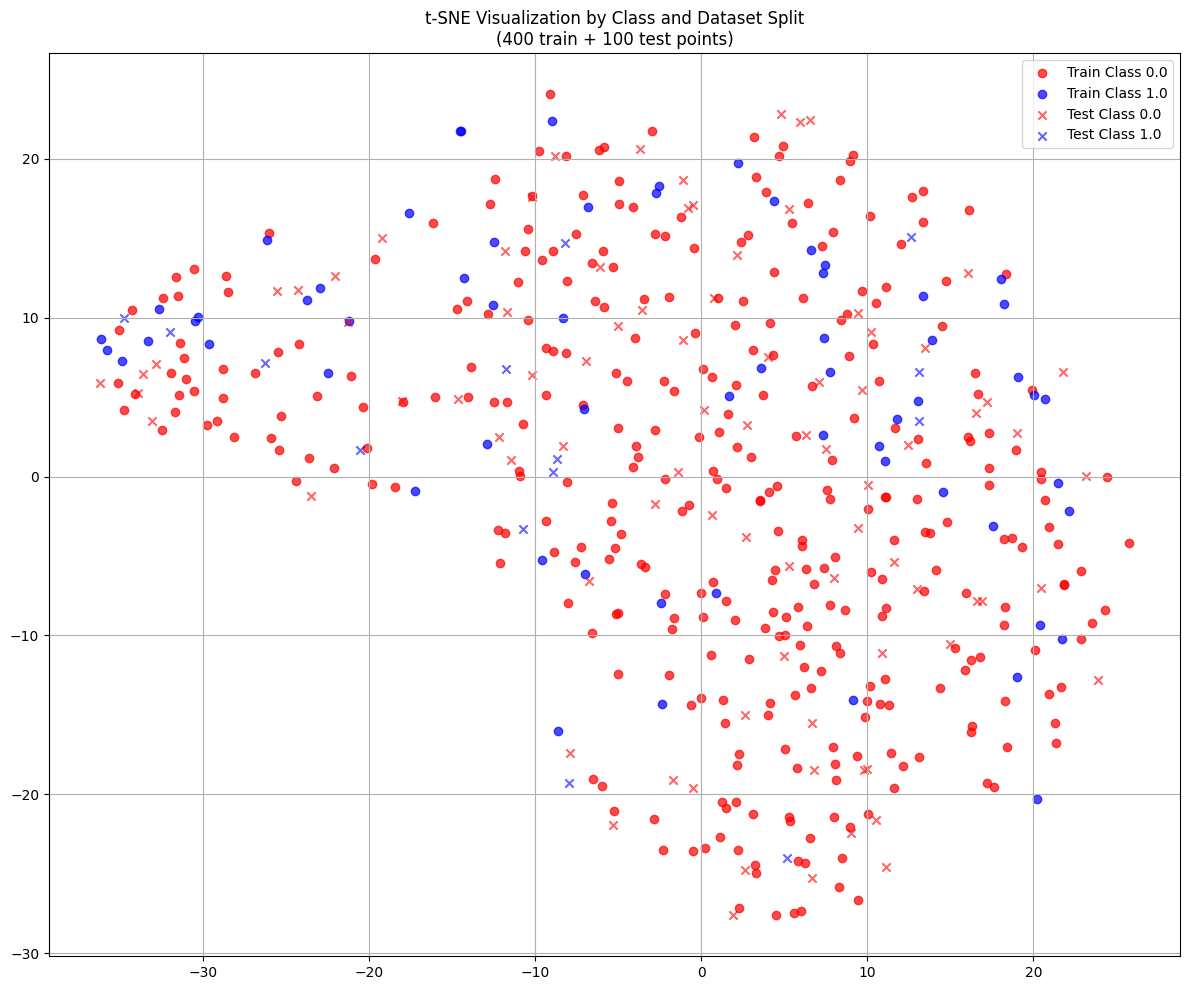

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1. Stack train and test data together
X_combined = np.vstack([X_train_subsampled, X_test_subsampled])
y_combined = np.hstack([y_train_subsampled, y_test_subsampled])

# 2. Fit t-SNE once on the combined data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_combined_2d = tsne.fit_transform(X_combined)

# 3. Split t-SNE result back into train and test
n_train = len(X_train_subsampled)
X_train_2d = X_combined_2d[:n_train]
X_test_2d = X_combined_2d[n_train:]
y_train_combined = y_combined[:n_train]
y_test_combined = y_combined[n_train:]

# 4. Plot
plt.figure(figsize=(12, 10))

# Define color map manually for class 0.0 and 1.0
color_map = {0.0: 'red', 1.0: 'blue'}

# Plot train points
for cls in np.unique(y_train_combined):
    mask = y_train_combined == cls
    plt.scatter(
        X_train_2d[mask, 0], X_train_2d[mask, 1],
        c=color_map[cls], alpha=0.7, label=f"Train Class {cls}", marker='o'
    )

# Plot test points
for cls in np.unique(y_test_combined):
    mask = y_test_combined == cls
    plt.scatter(
        X_test_2d[mask, 0], X_test_2d[mask, 1],
        c=color_map[cls], alpha=0.6, label=f"Test Class {cls}", marker='x'
    )

# Title and grid
plt.title(f"t-SNE Visualization by Class and Dataset Split\n({n_train} train + {len(X_test_subsampled)} test points)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Fit t-SNE to 3D
tsne = TSNE(
    n_components=3,         # Now 3D output
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
X_sub_3d = tsne.fit_transform(X_train_subsampled)




/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


# Applying RBF Kernel to t-sne 2D and mapping it.
- This is scientifically wrong because the distances on the t-sne plot mean nothing. We have a loss of information because plotting high dimensional data in 2D space (AND Even with Euclidian Distance)
- But it is interesting to see how the SVM behaves and fails!   

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


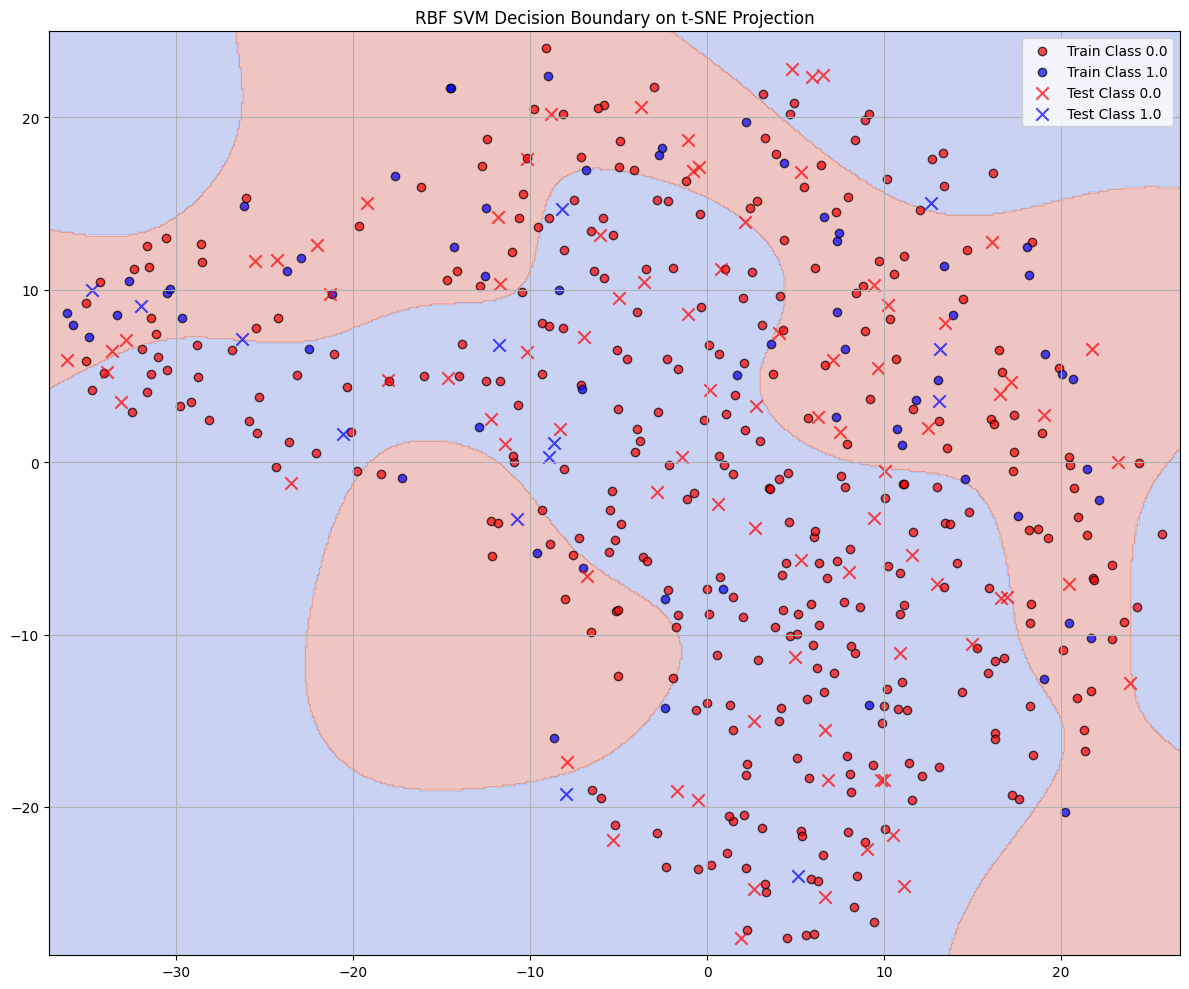

In [ ]:
from sklearn.manifold import TSNE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 1. Combine and run t-SNE
X_combined = np.vstack([X_train_subsampled, X_test_subsampled])
y_combined = np.hstack([y_train_subsampled, y_test_subsampled])

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_combined_2d = tsne.fit_transform(X_combined)

n_train = len(X_train_subsampled)
X_train_2d = X_combined_2d[:n_train]
X_test_2d = X_combined_2d[n_train:]
y_train = y_combined[:n_train]
y_test = y_combined[n_train:]

# 2. Train SVM on 2D t-SNE projected train data
clf_rbf = SVC(kernel='rbf', gamma=0.01, C=16.0, class_weight='balanced')
clf_rbf.fit(X_train_2d, y_train)

# 3. Create meshgrid for decision boundary
h = 0.1
x_min, x_max = X_combined_2d[:, 0].min() - 1, X_combined_2d[:, 0].max() + 1
y_min, y_max = X_combined_2d[:, 1].min() - 1, X_combined_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 4. Plot
plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Color and marker scheme
color_map = {0.0: 'red', 1.0: 'blue'}

# Train scatter by class
for cls in np.unique(y_train):
    mask = y_train == cls
    plt.scatter(X_train_2d[mask, 0], X_train_2d[mask, 1],
                c=color_map[cls], marker='o', edgecolor='k', alpha=0.7,
                label=f"Train Class {cls}")

# Test scatter by class
for cls in np.unique(y_test):
    mask = y_test == cls
    plt.scatter(X_test_2d[mask, 0], X_test_2d[mask, 1],
                c=color_map[cls], marker='x', s=80, alpha=0.7,
                label=f"Test Class {cls}")

plt.title("RBF SVM Decision Boundary on t-SNE Projection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_train,clf_rbf.predict(X_train_2d)))
print(classification_report(y_test,clf_rbf.predict(X_test_2d)))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91       417
         1.0       0.55      1.00      0.71        83

    accuracy                           0.87       500
   macro avg       0.78      0.92      0.81       500
weighted avg       0.93      0.87      0.88       500

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        40
         1.0       0.21      0.30      0.25        10

    accuracy                           0.64        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.69      0.64      0.66        50



# Random Forest

Random Forest Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80    143314
         1.0       0.34      0.77      0.47     28586

    accuracy                           0.71    171900
   macro avg       0.64      0.74      0.64    171900
weighted avg       0.84      0.71      0.75    171900

Random Forest Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80     35867
         1.0       0.33      0.76      0.46      7108

    accuracy                           0.71     42975
   macro avg       0.63      0.73      0.63     42975
weighted avg       0.84      0.71      0.74     42975



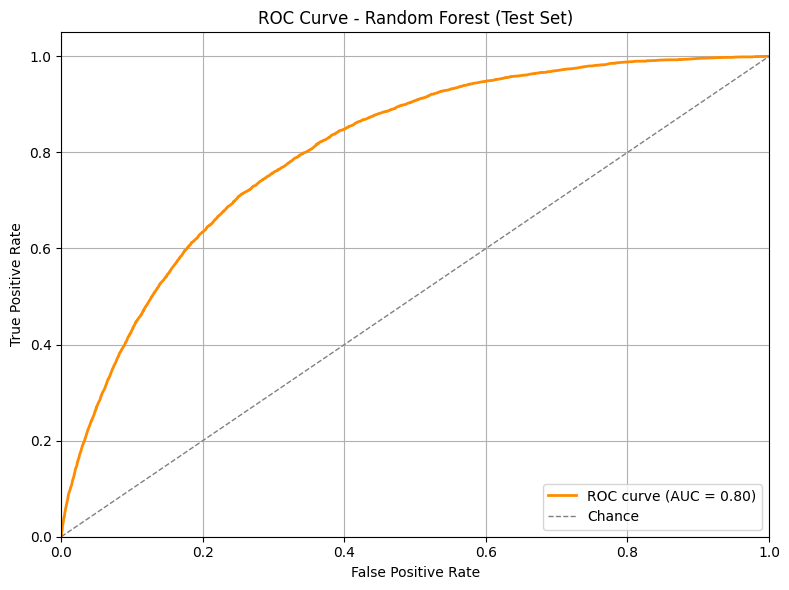

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_dropped = df_encoded[best_predictors  + [target_col]]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    df_dropped.drop(target_col, axis=1),
    df_dropped[target_col],
    test_size=0.2,
    random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,     # number of trees
    max_depth=11,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train_rf, y_train_rf)


# Evaluate
print("Random Forest Classification Report (Train):")
print(classification_report(y_train_rf, rf_model.predict(X_train_rf)))

print("Random Forest Classification Report (Test):")
print(classification_report(y_test_rf, rf_model.predict(X_test_rf)))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_scores = rf_model.predict_proba(X_test_rf)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test_rf, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



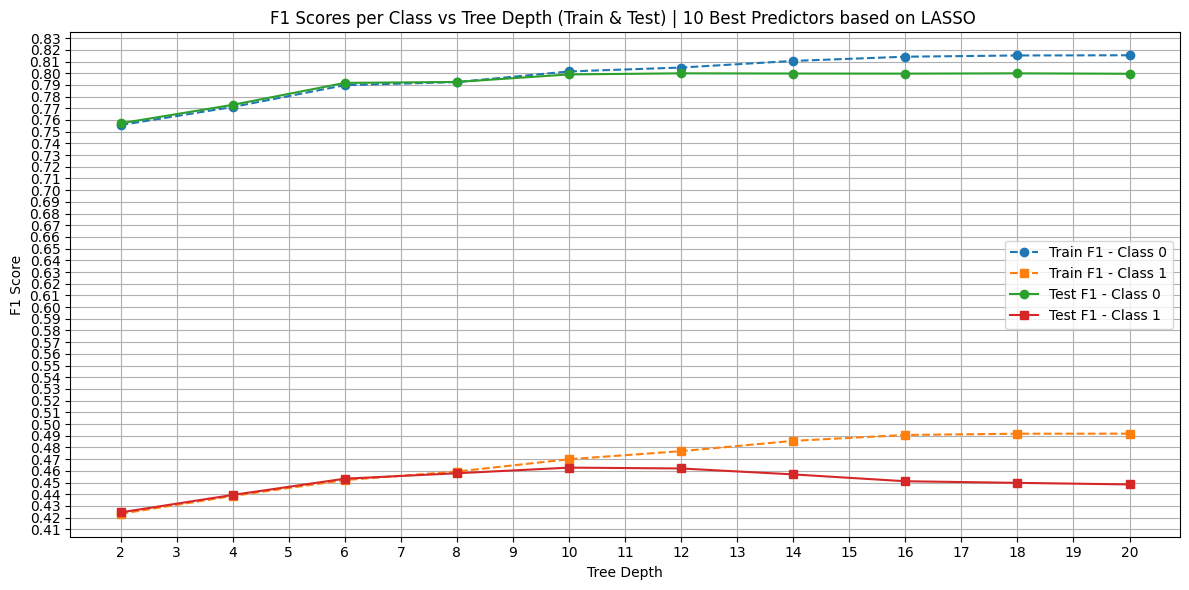

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.ticker as ticker
# Prepare data
df_dropped = df_encoded[best_predictors + [target_col]]
X = df_dropped.drop(target_col, axis=1)
y = df_dropped[target_col]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Depth values
depths = range(2, 22, 2)

# Store F1 scores
f1_class_0_train, f1_class_1_train = [], []
f1_class_0_test, f1_class_1_test = [], []

for depth in depths:
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=depth,
        random_state=42,
        class_weight='balanced'
    )
    rf_model.fit(X_train_rf, y_train_rf)

    # Predictions
    y_train_pred = rf_model.predict(X_train_rf)
    y_test_pred = rf_model.predict(X_test_rf)

    # Classification reports
    report_train = classification_report(y_train_rf, y_train_pred, output_dict=True, zero_division=0)
    report_test = classification_report(y_test_rf, y_test_pred, output_dict=True, zero_division=0)

    # Append F1 scores
    f1_class_0_train.append(report_train.get('0.0', {}).get('f1-score', 0.0))
    f1_class_1_train.append(report_train.get('1.0', {}).get('f1-score', 0.0))
    f1_class_0_test.append(report_test.get('0.0', {}).get('f1-score', 0.0))
    f1_class_1_test.append(report_test.get('1.0', {}).get('f1-score', 0.0))

# Plot
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(min(depths), max(depths) + 1, 1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.plot(depths, f1_class_0_train, 'o--', label='Train F1 - Class 0')
plt.plot(depths, f1_class_1_train, 's--', label='Train F1 - Class 1')
plt.plot(depths, f1_class_0_test, 'o-', label='Test F1 - Class 0')
plt.plot(depths, f1_class_1_test, 's-', label='Test F1 - Class 1')


plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('F1 Scores per Class vs Tree Depth (Train & Test) | 10 Best Predictors based on LASSO ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


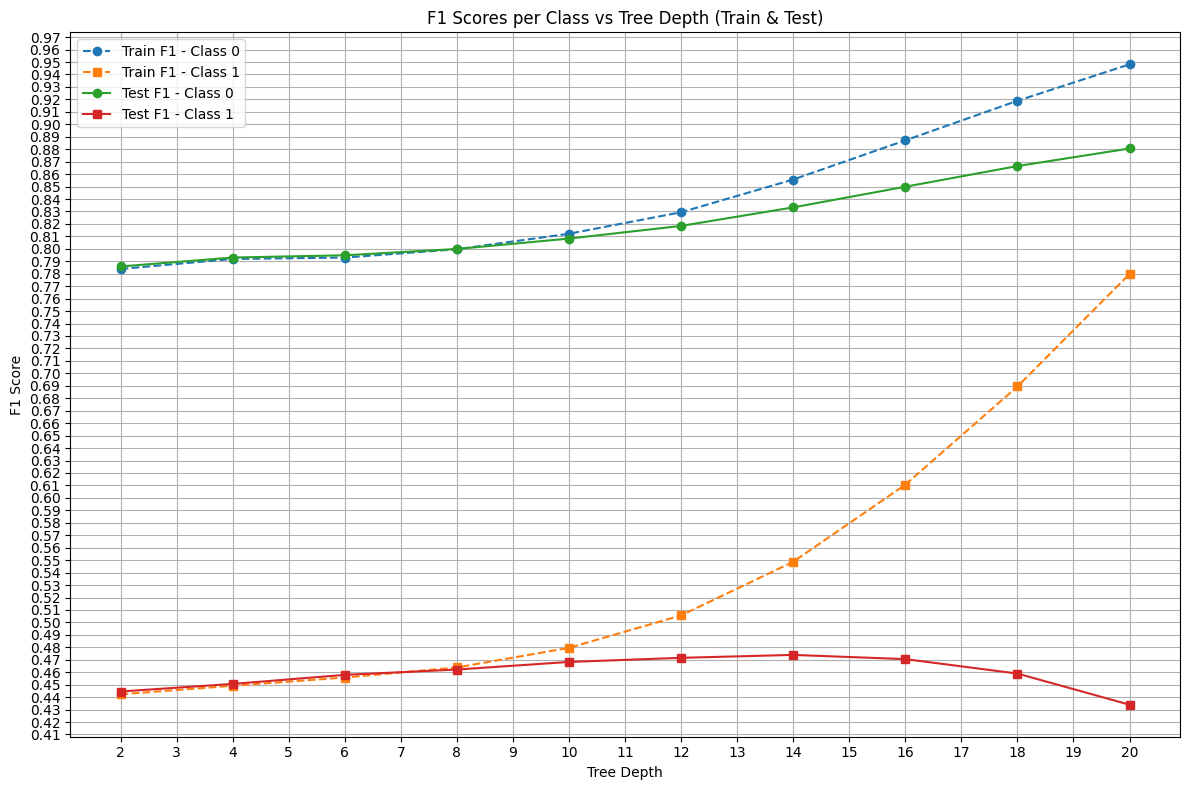

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare data
df_dropped = df_encoded
X = df_dropped.drop(target_col, axis=1)
y = df_dropped[target_col]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Depth values
depths = range(2, 22, 2)

# Store F1 scores
f1_class_0_train, f1_class_1_train = [], []
f1_class_0_test, f1_class_1_test = [], []

for depth in depths:
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=depth,
        random_state=42,
        class_weight='balanced'
    )
    rf_model.fit(X_train_rf, y_train_rf)

    # Predictions
    y_train_pred = rf_model.predict(X_train_rf)
    y_test_pred = rf_model.predict(X_test_rf)

    # Classification reports
    report_train = classification_report(y_train_rf, y_train_pred, output_dict=True, zero_division=0)
    report_test = classification_report(y_test_rf, y_test_pred, output_dict=True, zero_division=0)

    # Append F1 scores
    f1_class_0_train.append(report_train.get('0.0', {}).get('f1-score', 0.0))
    f1_class_1_train.append(report_train.get('1.0', {}).get('f1-score', 0.0))
    f1_class_0_test.append(report_test.get('0.0', {}).get('f1-score', 0.0))
    f1_class_1_test.append(report_test.get('1.0', {}).get('f1-score', 0.0))

# Plot
plt.figure(figsize=(12, 8))

plt.xticks(np.arange(min(depths), max(depths) + 1, 1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.plot(depths, f1_class_0_train, 'o--', label='Train F1 - Class 0')
plt.plot(depths, f1_class_1_train, 's--', label='Train F1 - Class 1')
plt.plot(depths, f1_class_0_test, 'o-', label='Test F1 - Class 0')
plt.plot(depths, f1_class_1_test, 's-', label='Test F1 - Class 1')

plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('F1 Scores per Class vs Tree Depth (Train & Test)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(best_predictors)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'Age', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0']


In [ ]:
print(f1_class_1_test)

[0.4445187724726148, 0.4506227947115589, 0.4578813559322034, 0.4621589153938562, 0.46826441927837764, 0.47156764625602765, 0.4739157762413576, 0.4705324695844525, 0.45891618666980133, 0.43392320534223705]
